# File descriptions

## Main Datasets
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.

## Supplemental information about the items / products
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

### hints
- https://www.kaggle.com/homiarafarhana/predict-future-sales#LightGBM

In [1]:
import pandas as pd
import numpy as np

## Adding Supplemental Information
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

In [2]:
df_items = pd.read_csv("data/items.csv")
print("Linhas, Colunas",df_items.shape)
#df_items.head(2)

Linhas, Colunas (22170, 3)


In [3]:
df_item_categories = pd.read_csv("data/item_categories.csv")
print("Linhas, Colunas",df_item_categories.shape)
#df_item_categories.head(2)

Linhas, Colunas (84, 2)


In [4]:
df_shops = pd.read_csv("data/shops.csv")
print("Linhas, Colunas",df_shops.shape)
#df_shops.head(2)

Linhas, Colunas (60, 2)


## Adding Main Datasets

- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.

In [5]:
df_train = pd.read_csv("data/sales_train.csv")
print("Linhas, Colunas",df_train.shape)
#df_train.head(2)

Linhas, Colunas (2935849, 6)


In [6]:
df_test = pd.read_csv("data/test.csv")
print("Linhas, Colunas",df_test.shape)
#df_test.head(2)

Linhas, Colunas (214200, 3)


# Objective
## We are asking you to predict total sales for every product and store in the next month. 

In [7]:
print("List Environment")
%who
print("")
print("")
print("List Environment and show Type and Data/Info")
%whos
print("")
print("")
print("List Environment and turn into List")
%who_ls

List Environment
df_item_categories	 df_items	 df_shops	 df_test	 df_train	 np	 pd	 


List Environment and show Type and Data/Info
Variable             Type         Data/Info
-------------------------------------------
df_item_categories   DataFrame               item_category_<...>\n\n[84 rows x 2 columns]
df_items             DataFrame                             <...>n[22170 rows x 3 columns]
df_shops             DataFrame                             <...>вль ТЦ "Альтаир"       59
df_test              DataFrame                ID  shop_id  <...>[214200 rows x 3 columns]
df_train             DataFrame                   date  date<...>2935849 rows x 6 columns]
np                   module       <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
pd                   module       <module 'pandas' from 'D:<...>es\\pandas\\__init__.py'>


List Environment and turn into List


['df_item_categories',
 'df_items',
 'df_shops',
 'df_test',
 'df_train',
 'np',
 'pd']

In [8]:
print(f'train size {df_train.shape[0]}, unique item in train {df_train.item_id.nunique()},unique shop in train {df_train.shop_id.nunique()}')
print(f'train size {df_test.shape[0]}, unique item in train {df_test.item_id.nunique()},unique shop in train {df_test.shop_id.nunique()}')

train size 2935849, unique item in train 21807,unique shop in train 60
train size 214200, unique item in train 5100,unique shop in train 42


In [9]:
df_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

<AxesSubplot:xlabel='date_block_num'>

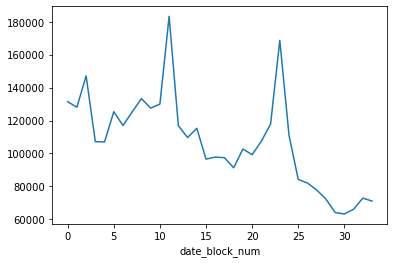

In [10]:
sale_by_month = df_train.groupby('date_block_num')['item_cnt_day'].sum()
sale_by_month.plot()

In [14]:
df_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
